Лабораторная 5 Цапий Вадим

# Линейные модели, SVM и деревья решений.

Цель лабораторной работы: изучение линейных моделей, SVM и деревьев решений.
Задание:

1. Выберите набор данных (датасет) для решения задачи классификации или регресии.
2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4. Обучите одну из линейных моделей, SVM и 3 дерево решений. Оцените качество моделей с помощью трех подходящих для задачи метрик. Сравните качество полученных моделей.
5. Произведите для каждой модели подбор одного гиперпараметра с использованием GridSearchCV и кросс-валидации.
6. Повторите пункт 4 для найденных оптимальных значений гиперпараметров. Сравните качество полученных моделей с качеством моделей, полученных в пункте 4.

1. Подготовка данных; датасет -
https://www.kaggle.com/ronitf/heart-disease-uci/version/1
1. age;---возраст;
2. sex;---пол;
3. chest pain type (4 values);---Тип боли;
4. resting blood pressure;---Кровяное давление в покое;
5. serum cholestoral in mg/dl;---Холестерин;
6. fasting blood sugar > 120 mg/dl;---Сахар в крови;
7. resting electrocardiographic results (values 0,1,2);---Электрокардиография в покое;
8. maximum heart rate achieved;---Максимальный сердечный ритм;
9. exercise induced angina;---Стенокардия вызванная физической нагрузкой;
10. oldpeak = ST depression induced by exercise relative to rest;---депрессия вызванная физ упражнениями;
11. the slope of the peak exercise ST segment;---Наклон пика упражнений;
12. number of major vessels (0-3) colored by flourosopy;---Кол-во крупных сосоудов по цвету
thal: 3 = normal; 6 = fixed defect; 7 = reversable defect;

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [37]:
data = pd.read_csv('C:/Users/VTsapiy/Desktop/data/heart.csv')

In [38]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [39]:
data.shape

(303, 14)

In [40]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Пустые значения отсутствуют

In [41]:
#Разделим датасет на тестовую и обучающую выборки
X = data.drop('target',axis = 1).values
y = data['target'].values

In [42]:
from sklearn.model_selection import train_test_split
# Функция train_test_split разделила исходную выборку таким образом, 
#чтобы в обучающей и тестовой частях сохранились пропорции классов.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1)

In [43]:
print('X_train: {}  y_train: {}'.format(X_train.shape, y_train.shape))

X_train: (212, 13)  y_train: (212,)


In [44]:
print('X_test: {}  y_test: {}'.format(X_test.shape, y_test.shape))

X_test: (91, 13)  y_test: (91,)


In [45]:
np.unique(y_train)

array([0, 1], dtype=int64)

In [46]:
np.unique(y_test)

array([0, 1], dtype=int64)

In [47]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

## Сравнение качества трех линейных моделей

### SGDClassifier (градиентный метод)

In [48]:
import warnings
warnings.filterwarnings('ignore')

sgd = SGDClassifier().fit(X_train, y_train)
predicted_sgd = sgd.predict(X_test)

In [49]:
accuracy_score(y_test, predicted_sgd)

0.6043956043956044

In [50]:
balanced_accuracy_score(y_test, predicted_sgd)

0.563170731707317

In [51]:
(precision_score(y_test, predicted_sgd, average='weighted'), 
 recall_score(y_test, predicted_sgd, average='weighted'))

(0.706698063840921, 0.6043956043956044)

In [52]:
f1_score(y_test, predicted_sgd, average='weighted')

0.5144743316385108

### LinearSVC  (линейный)

In [53]:
svc = LinearSVC(C=1.0).fit(X_train, y_train)
predicted_svc = svc.predict(X_test)

In [54]:
accuracy_score(y_test, predicted_svc)

0.7472527472527473

In [55]:
balanced_accuracy_score(y_test, predicted_svc)

0.7436585365853658

In [56]:
(precision_score(y_test, predicted_svc, average='weighted'), 
 recall_score(y_test, predicted_svc, average='weighted'))

(0.7468164188752423, 0.7472527472527473)

In [57]:
f1_score(y_test, predicted_svc, average='weighted')

0.7469438030494138

### DecisionTreeClassifier (дерево решений)

In [58]:
dtc = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
predicted_dtc = dtc.predict(X_test)

In [59]:
accuracy_score(y_test, predicted_dtc)

0.7472527472527473

In [60]:
balanced_accuracy_score(y_test, predicted_dtc)

0.7524390243902439

In [61]:
(precision_score(y_test, predicted_dtc, average='weighted'), 
 recall_score(y_test, predicted_dtc, average='weighted'))

(0.7569799386659851, 0.7472527472527473)

In [62]:
f1_score(y_test, predicted_dtc, average='weighted')

0.7476802525733297

In [63]:
n_range = np.array(range(0,100,5))
n_range = n_range / 100
tuned_parameters = [{'l1_ratio': n_range}]
tuned_parameters

[{'l1_ratio': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
         0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])}]

### Подбор одного гиперпараметра с использованием GridSearchCV и кросс-валидации

In [64]:
warnings.filterwarnings('ignore')

clf_gs_sgd = GridSearchCV(SGDClassifier(), tuned_parameters, cv=5,
                      scoring='accuracy')
clf_gs_sgd.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'l1_ratio': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])}],
             pre_dispatch='2*n_jo

In [65]:
clf_gs_sgd.best_params_

{'l1_ratio': 0.4}

In [66]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

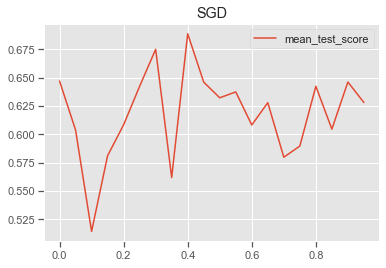

In [67]:
plt.title('SGD')
plt.plot(n_range, clf_gs_sgd.cv_results_['mean_test_score'],label='mean_test_score')
plt.legend()
plt.show()

In [68]:
n_range = np.array(range(1,20,1))
tuned_parameters = [{'C': n_range}]
tuned_parameters

[{'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19])}]

In [69]:
clf_gs_svm = GridSearchCV(LinearSVC(), tuned_parameters, cv=3,
                      scoring='accuracy')
clf_gs_svm.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [70]:
clf_gs_svm.best_params_

{'C': 17}

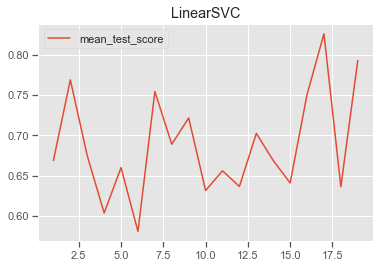

In [71]:
plt.title('LinearSVC')
plt.plot(n_range, clf_gs_svm.cv_results_['mean_test_score'],label='mean_test_score')
plt.legend()
plt.show()

In [72]:
n_range = np.array(range(1,7,1))
tuned_parameters = [{'max_depth': n_range}]
tuned_parameters

[{'max_depth': array([1, 2, 3, 4, 5, 6])}]

In [73]:
clf_gs_dt = GridSearchCV(DecisionTreeClassifier(random_state=1), tuned_parameters,
                          cv=5, scoring='accuracy')
clf_gs_dt.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=1, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': array([1, 2, 3, 4, 5, 6])}],
             pre_dispatch='2*n_jobs', refit=True, return_tr

In [74]:
clf_gs_dt.best_params_

{'max_depth': 4}

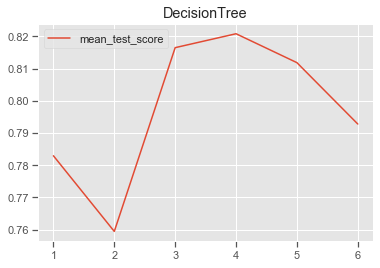

In [75]:
plt.title('DecisionTree')
plt.plot(n_range, clf_gs_dt.cv_results_['mean_test_score'],label='mean_test_score')
plt.legend()
plt.show()

### Сравнение качества полученных моделей с качеством моделей, полученных ранее
### SGD

In [76]:
sgd_optimized = SGDClassifier(l1_ratio=clf_gs_sgd.best_params_['l1_ratio']).fit(X_train, y_train)
predicted_sgd_opt = sgd_optimized.predict(X_test)

In [77]:
accuracy_score(y_test, predicted_sgd_opt)

0.5934065934065934

In [78]:
balanced_accuracy_score(y_test, predicted_sgd_opt)

0.5487804878048781

In [79]:
(precision_score(y_test, predicted_sgd_opt, average='weighted'), 
 recall_score(y_test, predicted_sgd_opt, average='weighted'))

(0.766325628394594, 0.5934065934065934)

In [80]:
f1_score(y_test, predicted_sgd_opt, average='weighted')

0.4811564753170593

### LinearSVC

In [81]:
svm_optimized = LinearSVC(C=clf_gs_svm.best_params_['C']).fit(X_train, y_train)
predicted_svm_opt = svm_optimized.predict(X_test)

In [82]:
accuracy_score(y_test, predicted_svm_opt)

0.7142857142857143

In [83]:
balanced_accuracy_score(y_test, predicted_svm_opt)

0.7334146341463414

In [84]:
(precision_score(y_test, predicted_svm_opt, average='weighted'), 
 recall_score(y_test, predicted_svm_opt, average='weighted'))

(0.775175644028103, 0.7142857142857143)

In [85]:
f1_score(y_test, predicted_svm_opt, average='weighted')

0.7065826330532212

### DecisionTree

In [86]:
dt_optimized = DecisionTreeClassifier(max_depth=clf_gs_dt.best_params_['max_depth']).fit(X_train, y_train)
predicted_dt_opt = dt_optimized.predict(X_test)

In [87]:
accuracy_score(y_test, predicted_dt_opt)

0.7472527472527473

In [88]:
balanced_accuracy_score(y_test, predicted_dt_opt)

0.7436585365853658

In [89]:
(precision_score(y_test, predicted_dt_opt, average='weighted'), 
 recall_score(y_test, predicted_dt_opt, average='weighted'))

(0.7468164188752423, 0.7472527472527473)

In [90]:
f1_score(y_test, predicted_dt_opt, average='weighted')

0.7469438030494138

Сравнив 3 метода, можно сказать что, наибольшая точность у дерева решений, затем идет линейный метод, SGD на последнем месте по результатам.